In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
import glob
import random
from matplotlib import patches
import shutil

In [2]:
!unzip /content/drive/MyDrive/dataset_facecup.zip -d /content/dataset

Archive:  /content/drive/MyDrive/dataset_facecup.zip
   creating: /content/dataset/images/
  inflating: /content/dataset/images/9_23.jpg  
  inflating: /content/dataset/images/9_27.jpg  
  inflating: /content/dataset/images/21_8.jpg  
  inflating: /content/dataset/images/21_9.jpg  
  inflating: /content/dataset/images/21_23.jpg  
  inflating: /content/dataset/images/24_0.jpg  
  inflating: /content/dataset/images/25_16.jpg  
  inflating: /content/dataset/images/28_24.jpg  
  inflating: /content/dataset/images/28_26.jpg  
  inflating: /content/dataset/images/31_3.jpg  
  inflating: /content/dataset/images/33_12.jpg  
  inflating: /content/dataset/images/34_14.jpg  
  inflating: /content/dataset/images/35_5.jpg  
  inflating: /content/dataset/images/35_11.jpg  
  inflating: /content/dataset/images/35_18.jpg  
  inflating: /content/dataset/images/36_8.jpg  
  inflating: /content/dataset/images/42_54.jpg  
  inflating: /content/dataset/images/42_57.jpg  
  inflating: /content/dataset/image

In [4]:
def count_files(dir):
  patt = dir + '/*'
  files = glob.glob(patt)
  return len(files)

print(count_files('/content/dataset/images'))

348


In [5]:
print(count_files('/content/dataset/labels'))

348


In [8]:
dataset_dir = 'dataset'
images_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')

train_images_dir = os.path.join(dataset_dir, 'train', 'images')
test_images_dir = os.path.join(dataset_dir, 'test', 'images')
train_labels_dir = os.path.join(dataset_dir, 'train', 'labels')
test_labels_dir = os.path.join(dataset_dir, 'test', 'labels')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)

image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
test_files = random.sample(image_files, 70)

for file_name in image_files:
    image_name = os.path.splitext(file_name)[0]
    src_image_path = os.path.join(images_dir, file_name)
    src_label_path = os.path.join(labels_dir, image_name + '.txt')

    if file_name in test_files:
        dst_image_path = os.path.join(test_images_dir, file_name)
        dst_label_path = os.path.join(test_labels_dir, image_name + '.txt')
    else:
        dst_image_path = os.path.join(train_images_dir, file_name)
        dst_label_path = os.path.join(train_labels_dir, image_name + '.txt')

    shutil.move(src_image_path, dst_image_path)
    if os.path.exists(src_label_path):
        shutil.move(src_label_path, dst_label_path)

print("Data split completed successfully!")

Data split completed successfully!


In [9]:
print(count_files('/content/dataset/train/images'))

278


In [10]:
print(count_files('/content/dataset/train/labels'))

278


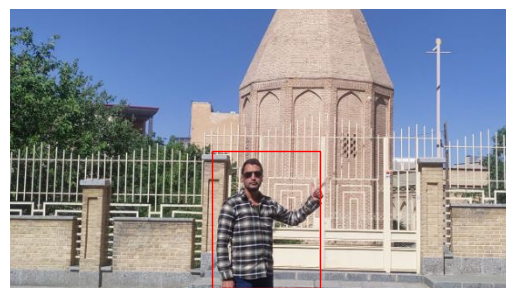

In [17]:
def show_data(images_dir, labels_dir):
    image_files = os.listdir(images_dir)
    random_image = random.choice(image_files)
    img_path = os.path.join(images_dir, random_image)
    img = cv2.imread(img_path)
    height, width, _ = img.shape

    label_file = os.path.splitext(random_image)[0] + '.txt'
    label_path = os.path.join(labels_dir, label_file)

    with open(label_path, 'r') as f:
        for line in f:
            values = [float(x) for x in line.split()]
            x, y, w, h = values[1] * width, values[2] * height, values[3] * width, values[4] * height
            x1, y1 = x - w / 2, y - h / 2
            rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.gca().add_patch(rect)

    plt.axis('off')
    plt.show()

images_directory = "/content/dataset/train/images"
labels_directory = "/content/dataset/train/labels"
show_data(images_directory, labels_directory)

In [18]:
!nvidia-smi

Thu Apr  3 11:15:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [20]:
os.environ["DATASET_DIRECTORY"] = "/content/dataset"

In [21]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.7/112.6 GB disk)


In [22]:
# %cd {HOME}
# !yolo task=detect mode=train model=yolo11s.pt data='/content/dataset/data.yaml' epochs=20 imgsz=640 plots=True

In [29]:
!yolo task=detect mode=predict model='/content/gender_human_datection.pt' conf=0.30 source='/content/test5.mp4' save=True

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/556) /content/test5.mp4: 640x384 1 male, 49.8ms
video 1/1 (frame 2/556) /content/test5.mp4: 640x384 1 male, 10.8ms
video 1/1 (frame 3/556) /content/test5.mp4: 640x384 2 males, 10.9ms
video 1/1 (frame 4/556) /content/test5.mp4: 640x384 3 males, 11.4ms
video 1/1 (frame 5/556) /content/test5.mp4: 640x384 3 males, 10.8ms
video 1/1 (frame 6/556) /content/test5.mp4: 640x384 1 male, 11.5ms
video 1/1 (frame 7/556) /content/test5.mp4: 640x384 1 male, 18.6ms
video 1/1 (frame 8/556) /content/test5.mp4: 640x384 1 male, 10.8ms
video 1/1 (frame 9/556) /content/test5.mp4: 640x384 1 male, 10.8ms
video 1/1 (frame 10/556) /content/test5.mp4: 640x384 1 male, 10.8ms
video 1/1 (frame 11/556) /content/test5.mp4: 640x384 1 male, 11.2ms
video 1/1 (frame 12/556) /content/test5.mp4: 640x384 1 male, 10.8ms
video 1/1 (frame 13/55

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")